In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploring Data

In [18]:
print(df.shape)  # Shape of dataset
print()
print("Null values list:")
print(df.isnull().sum() ) # Missing values

(891, 12)

Null values list:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


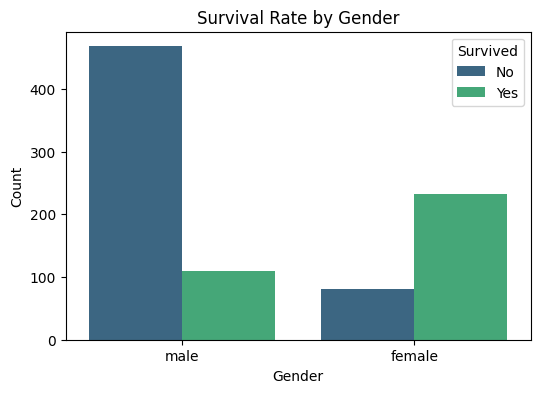

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

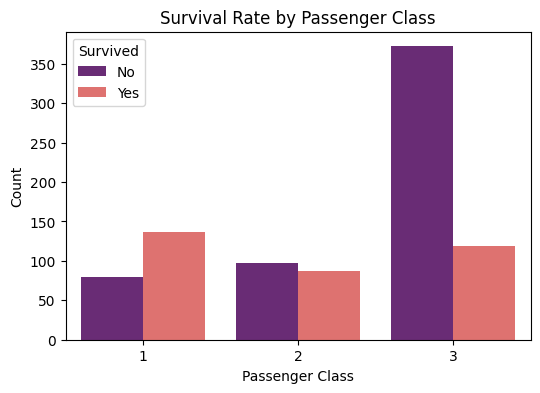

In [ ]:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='Pclass', hue='Survived', palette='magma')
    plt.title('Survival Rate by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Count')
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.show()

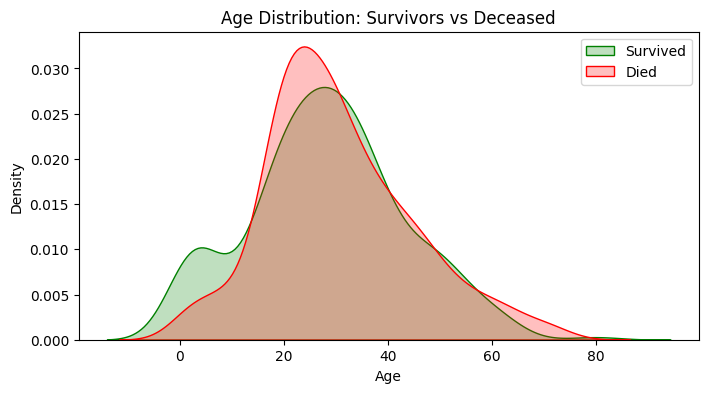

In [21]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', fill=True, color='g')
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Died', fill=True, color='r')
plt.title('Age Distribution: Survivors vs Deceased')
plt.xlabel('Age')
plt.legend()
plt.show()

In [22]:
# ' ([A-Za-z]+)\.' is a regular expr where:
# ' ' — a space before the title (ensures we capture the title after a space)
# [A-Za-z]+ — one or more alphabetic characters = the title (e.g., Mr, Mrs, Dr, Miss)
# \. — a literal dot, so it matches titles like "Mr.", "Dr."
# expand = False : Tells pandas to return a Series instead of a DataFrame.
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle','Miss')
df['Title'] = df['Title'].replace('Ms','Miss')
df['Title'] = df['Title'].replace('Mme','Mrs')

title_map = {"Mr" : 1,"Miss": 2,"Mrs" : 3, "Master" : 4, "Rare" : 5}
df['Title'] = df['Title'].map(title_map)
df['Title'] = df['Title'].fillna(0)  # safe fill

# Both SibSp and Parch columns are weak when compared indidvidually but when combined they are more useful
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Adding IsAlone column
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
C:\Users\USER\AppData\Local\Temp\ipykernel_25268\2465339081.py:6: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1


## Data Cleaning

In [24]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

df['Sex'] = df['Sex'].map({'female' : 1,'male' : 0})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
df = df.drop(drop_elements, axis = 1)

df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Title,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,0,3,0,22.0,0,7.2500,1,2,0,False,True
1,1,1,1,38.0,0,71.2833,3,2,0,False,False
2,1,3,1,26.0,0,7.9250,2,1,1,False,True
3,1,1,1,35.0,0,53.1000,3,2,0,False,True
4,0,3,0,35.0,0,8.0500,1,1,1,False,True


## Splitting Data

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
new_preds = rf_model.predict(X_test)

print(f"\nAdvanced Model Accuracy: {accuracy_score(y_test, new_preds) * 100:.2f}%")
print("Classification report: ")
print(classification_report(y_test, new_preds))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, new_preds))


Advanced Model Accuracy: 83.80%
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix: 
[[92 13]
 [16 58]]


## Saving Model

In [28]:
import joblib
joblib.dump(rf_model,'titanic_model.pkl')

['titanic_model.pkl']